#Installing Dependencies 

In [1]:
!pip -q install torch==1.7.0+cu101 torchvision==0.8.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip -q install numpy==1.18.5
!pip -q install PyYAML==5.3.1
!pip -q install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

In [4]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 8102, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 8102 (delta 92), reused 127 (delta 66), pack-reused 7913
Receiving objects: 100% (8102/8102), 14.16 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (5491/5491), done.
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
User install by explicit request
Created temporary directory: /tmp/pip-ephem-wheel-cache-qfqv1213
Created temporary directory: /tmp/pip-req-tracker-l3l5ud3y
Initialized build tracking at /tmp/pip-req-tracker-l3l5ud3y
Created build tracker: /tmp/pip-req-tracker-l3l5ud3y
Entered build tracker: /tmp/pip-req-tracker-l3l5ud3y
Created temporar

#Cloning The YoloV5

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 8298, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 8298 (delta 4), reused 0 (delta 0), pack-reused 8288
Receiving objects: 100% (8298/8298), 9.21 MiB | 29.11 MiB/s, done.
Resolving deltas: 100% (5744/5744), done.


#Downloading The Dataset & Other Necessary Files

In [6]:
#label file
!gdown --id 1Ou6uIeTazzNQ9xeGRjPOClL2QDjwuIM8
#yolov5x.yaml
!gdown --id 1VlyqBVrzAbxzRQCtIHltVzCWt_iMEiMp 
#Dataset
!gdown --id 14n-CS8yqtCZKd2bdrcBs3Njq8glxhoOl

Downloading...
From: https://drive.google.com/uc?id=1Ou6uIeTazzNQ9xeGRjPOClL2QDjwuIM8
To: /content/clothing.yaml
100% 153/153 [00:00<00:00, 67.6kB/s]
Downloading...
From: https://drive.google.com/uc?id=1VlyqBVrzAbxzRQCtIHltVzCWt_iMEiMp
To: /content/yolov5x.yaml
100% 1.35k/1.35k [00:00<00:00, 1.22MB/s]
Downloading...
From: https://drive.google.com/uc?id=14n-CS8yqtCZKd2bdrcBs3Njq8glxhoOl
To: /content/Clothing_Dataset.zip
10.5MB [00:00, 25.4MB/s]


In [7]:
#unziping the file
from zipfile import ZipFile
file_name = '/content/Clothing_Dataset.zip'

with ZipFile(file_name, 'r') as zipex:
  zipex.extractall()
  print('Done')

Done


#Visualizing The Custom Made Datasets

In [175]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from skimage.metrics import structural_similarity as ssim


In [25]:
path = '/content/Clothing_Dataset/Images/Train/'
images_list = os.listdir(path)

In [36]:
plt.rcParams['figure.dpi'] = 80
plt.rcParams["figure.figsize"] = (20,10)

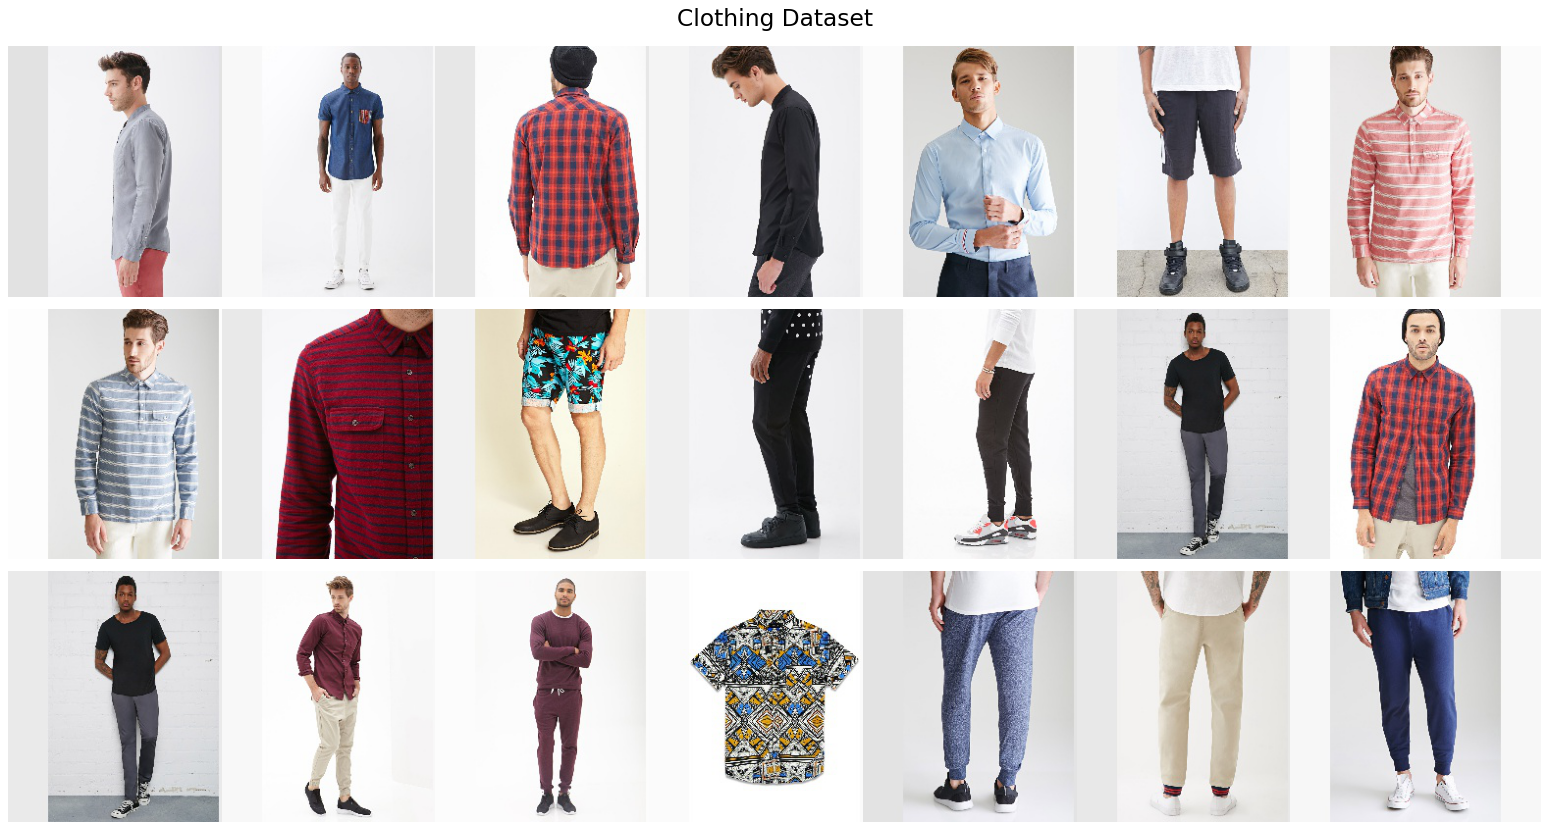

In [40]:
fig, axs = plt.subplots(3, 7)
for i in range(3):
  for j in range(7):
    index = np.random.randint(0, 200)
    image_path = path+images_list[index]
    image = Image.open(image_path)
    axs[i, j].imshow(image)
    axs[i, j].axis('off')

plt.suptitle("Clothing Dataset", fontsize=21, y=1.033)
plt.subplots_adjust(wspace=-0.40) 
plt.tight_layout()

#Performing Object Detection With YoloV5

In [41]:
%cd yolov5

/content/yolov5


In [45]:
!python train.py --img 256 --batch 5 --epochs 50 --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt --name yolov5x_clothing --cache

train: weights=yolov5x.pt, cfg=./models/yolov5x.yaml, data=./data/clothing.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=5, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=yolov5x_clothing, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-303-g3bef77f torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, trans

#Model Performance 

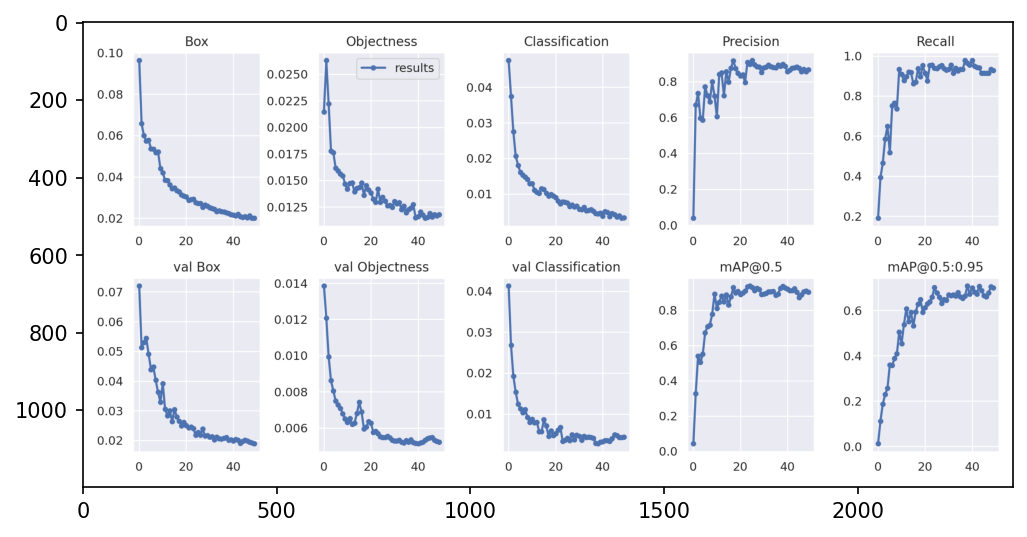

In [50]:
from matplotlib.pyplot import figure
figure(figsize=(8, 10), dpi=150)

img = Image.open('/content/yolov5/runs/train/yolov5x_clothing4/results.png')
plt.imshow(img)
plt.show()

#Validation Data Visualization

In [68]:
path = '/content/Clothing_Dataset/images/val/'
images_list = os.listdir(path)

In [69]:
plt.rcParams['figure.dpi'] = 80
plt.rcParams["figure.figsize"] = (20,10)

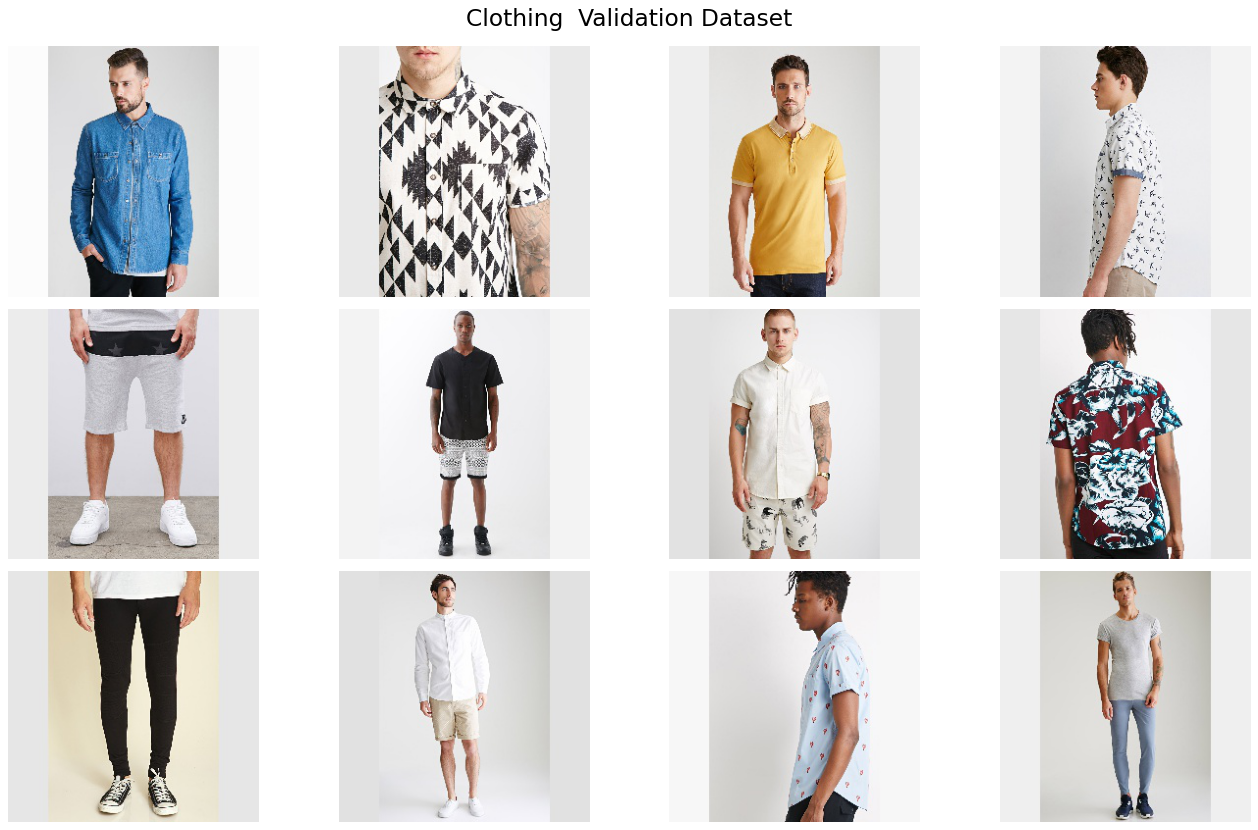

In [70]:
fig, axs = plt.subplots(3, 4)
index = 0
for i in range(3):
  for j in range(4):
    image_path = path+images_list[index]
    image = Image.open(image_path)
    axs[i, j].imshow(image)
    axs[i, j].axis('off')
    index = index+1

plt.suptitle("Clothing  Validation Dataset", fontsize=21, y=1.033)
plt.subplots_adjust(wspace=-0.40) 
plt.tight_layout()

#Testing The Model

In [63]:
!python detect.py --weights /content/yolov5/runs/train/yolov5x_clothing4/weights/best.pt --img 256 --conf 0.4 --source ../Clothing_Dataset/images/val/

detect: weights=['/content/yolov5/runs/train/yolov5x_clothing4/weights/best.pt'], source=../Clothing_Dataset/images/val/, imgsz=256, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-303-g3bef77f torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87225610 parameters, 0 gradients
image 1/66 /content/yolov5/../Clothing_Dataset/images/val/0ew_(1).jpg: 256x256 1 shirt, 1 short, 1 footwear, Done. (0.031s)
image 2/66 /content/yolov5/../Clothing_Dataset/images/val/0v07_2_side.jpg: 256x256 1 short, 1 footwear, Done. (0.030s)
image 3/66 /content/yolov5/../Clothing_Dataset/images/val/1104_2_side.jpg: 256x256 1 shirt, Done. (0.031s)
image 4/66 /content/yolov5/../Clothi

#Result

In [127]:
path = '/content/yolov5/runs/detect/exp2/'
images_list = os.listdir(path)

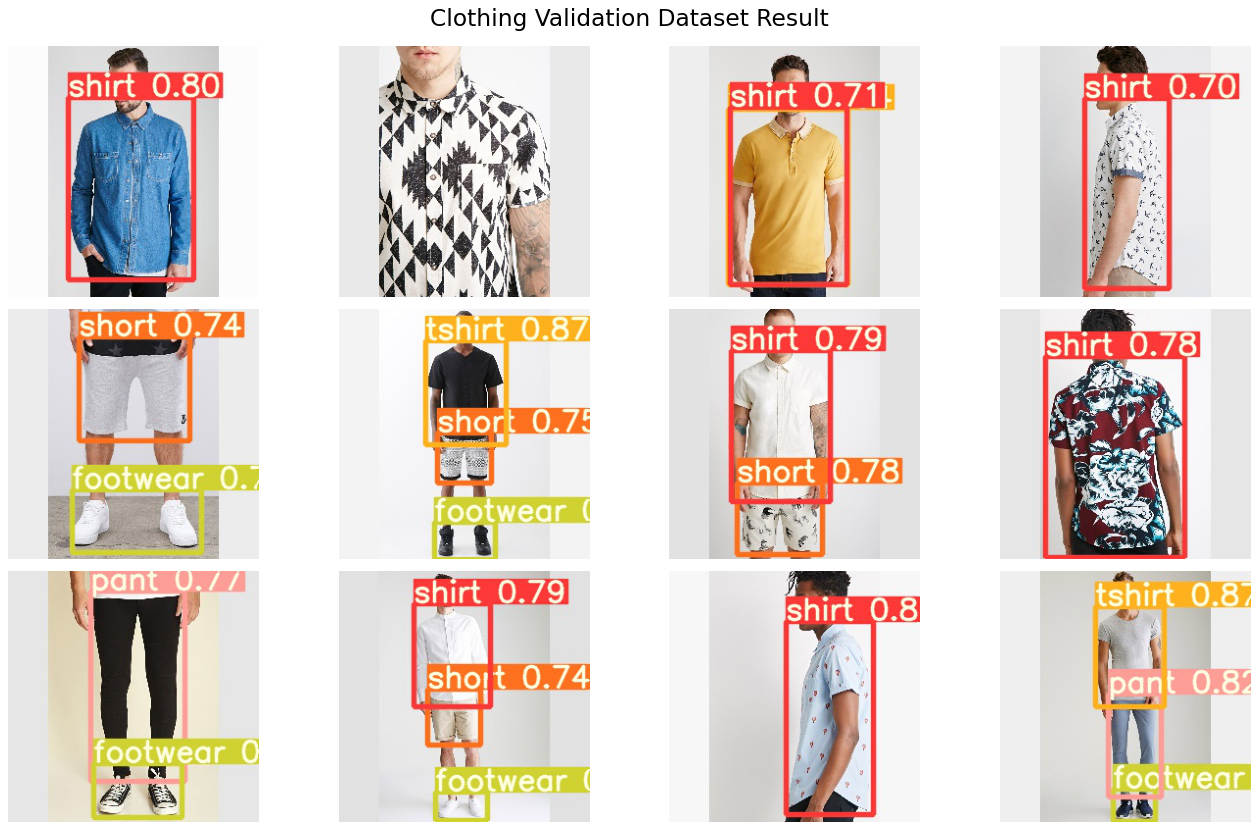

In [128]:
fig, axs = plt.subplots(3, 4)
index = 0
for i in range(3):
  for j in range(4):
    image_path = path+images_list[index]
    image = Image.open(image_path)
    axs[i, j].imshow(image)
    axs[i, j].axis('off')
    index = index+1

plt.suptitle("Clothing Validation Dataset Result", fontsize=21, y=1.033)
plt.subplots_adjust(wspace=-0.40) 
plt.tight_layout()

#Wardrobe

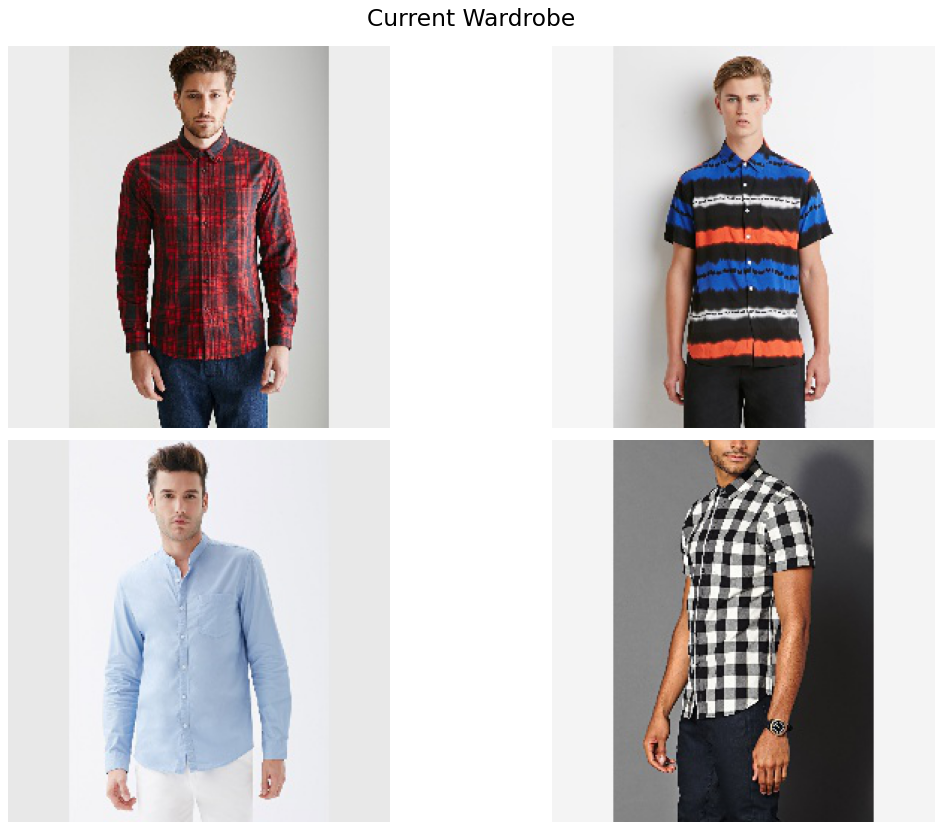

In [148]:
path = '/content/wardrobe/shirt/'
images_list = os.listdir(path)

fig, axs = plt.subplots(2, 2)
index = 0
for i in range(2):
  for j in range(2):
    image_path = path+images_list[index]
    image = Image.open(image_path)
    axs[i, j].imshow(image)
    axs[i, j].axis('off')
    index = index+1

plt.suptitle("Current Wardrobe", fontsize=21, y=1.033)
plt.subplots_adjust(wspace=-0.40) 
plt.tight_layout()

#Cropping The Current Wardrobe Items Images

In [150]:
!python detect.py --weights /content/yolov5/runs/train/yolov5x_clothing4/weights/best.pt --img 256 --conf 0.4 --source /content/wardrobe/shirt

detect: weights=['/content/yolov5/runs/train/yolov5x_clothing4/weights/best.pt'], source=/content/wardrobe/shirt, imgsz=256, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-303-g3bef77f torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87225610 parameters, 0 gradients
image 1/4 /content/wardrobe/shirt/s1.jpg: 256x256 1 shirt, Done. (0.031s)
image 2/4 /content/wardrobe/shirt/s2.jpg: 256x256 1 shirt, Done. (0.030s)
image 3/4 /content/wardrobe/shirt/s3.jpg: 256x256 1 shirt, Done. (0.030s)
image 4/4 /content/wardrobe/shirt/s4.jpg: 256x256 1 shirt, Done. (0.026s)
Results saved to runs/detect/exp4
Done. (0.157s)


#Users New Clothing

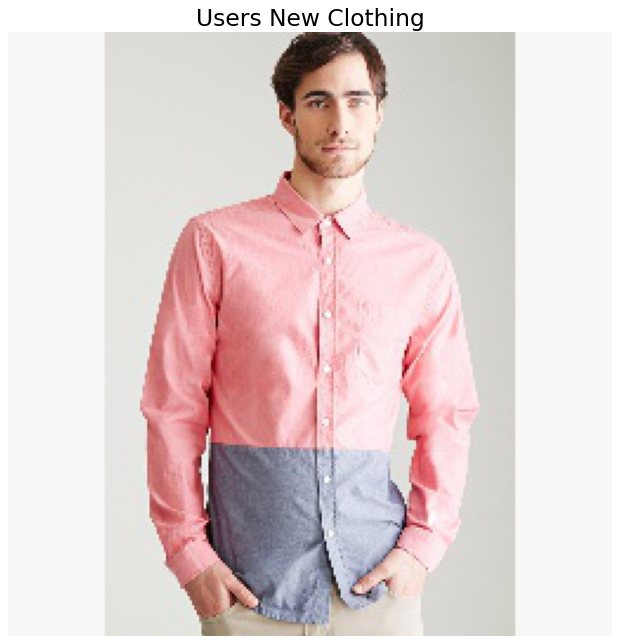

In [181]:
test_image_path = Image.open('/content/test.jpg')
plt.imshow(test_image_path)
plt.axis('off')
plt.title('Users New Clothing',fontsize=21)
plt.show()

#Clothing Detection

In [168]:
!python detect.py --weights /content/yolov5/runs/train/yolov5x_clothing4/weights/best.pt --img 256 --conf 0.4 --source /content/test.jpg

detect: weights=['/content/yolov5/runs/train/yolov5x_clothing4/weights/best.pt'], source=/content/test.jpg, imgsz=256, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-303-g3bef77f torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 476 layers, 87225610 parameters, 0 gradients
image 1/1 /content/test.jpg: 256x256 1 shirt, Done. (0.031s)
Results saved to runs/detect/exp6
Done. (0.040s)


#Result

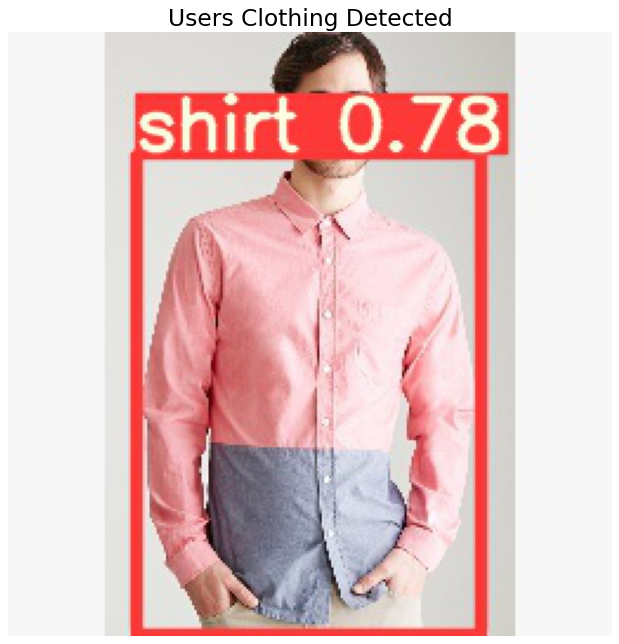

In [206]:
image = Image.open('/content/yolov5/runs/detect/exp6/test.jpg')
plt.imshow(image)
plt.axis('off')
plt.title('Users Clothing Detected',fontsize=21)
plt.show()

#Checking weather the current clothing already exicted or not

In [187]:
test_image_crop = cv2.imread('/content/yolov5/runs/detect/exp6/crops/shirt/test.jpg')
test_image_crop = cv2.resize(test_image, (150, 150))

In [188]:
path = '/content/yolov5/runs/detect/exp4/crops/shirt/'
current_cropped_images_list = os.listdir(path)

In [192]:
for i, image in enumerate(current_cropped_images_list):
  image_path = join(path, image)
  image = cv2.imread(image_path)
  image = cv2.resize(image, (150, 150))
  score= ssim(test_image_crop, image, multichannel=True)
  score = score*100
  if score > 60:
    print('Item already present in wardrobe')
  elif i+1==len(current_cropped_images_list):
    !mv /content/test.jpg /content/wardrobe/shirt
    print('Item Added to wardrobe')

Item Added to wardrobe


#Update Wardrobe 

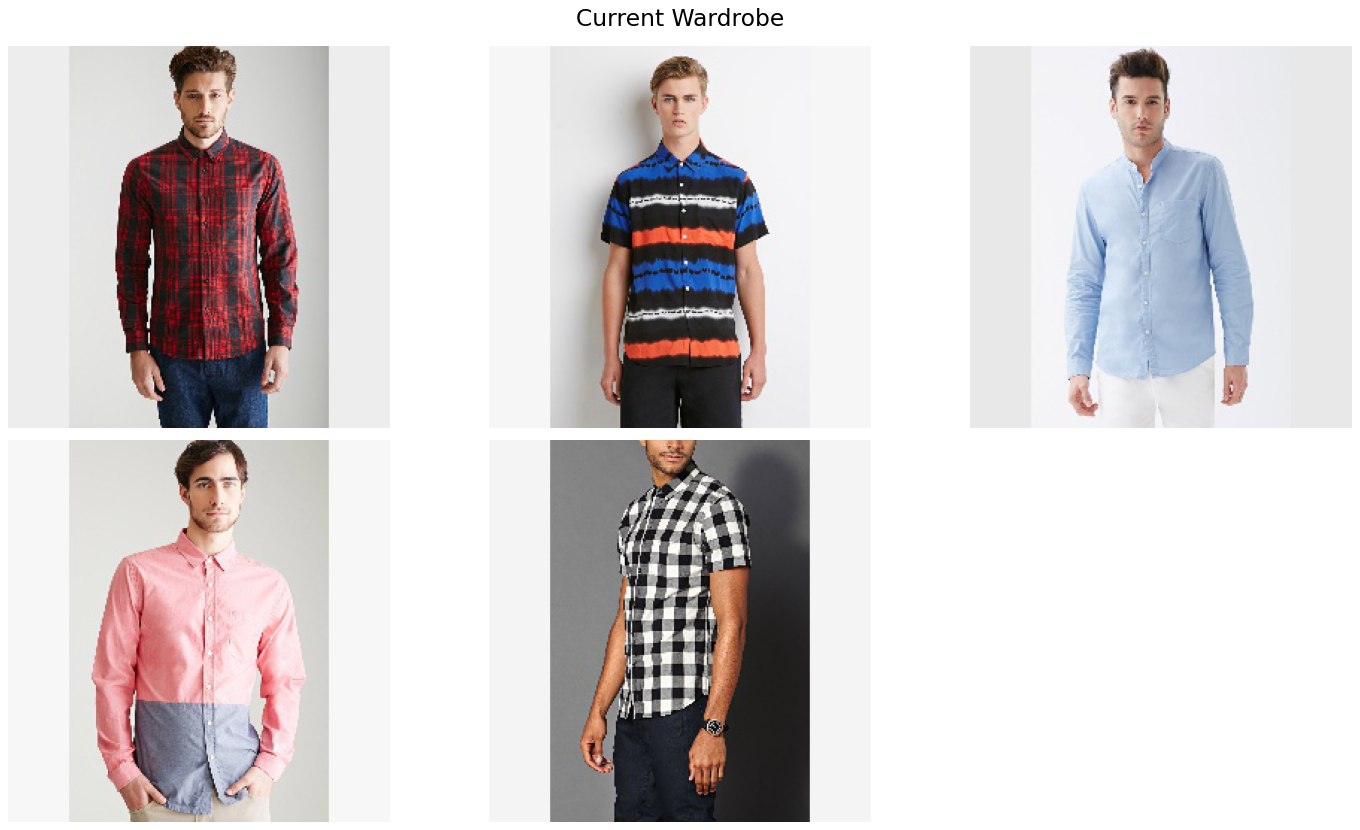

In [203]:
path = '/content/wardrobe/shirt/'
images_list = [image for image in listdir(path) if isfile(join(path, image))]

fig, axs = plt.subplots(2, 3)
index = 0
for i in range(2):
  for j in range(3):
    if index < 5:
      image_path = path+images_list[index]
      image = Image.open(image_path)
      axs[i, j].imshow(image)
      axs[i, j].axis('off')
      index = index+1

plt.suptitle("Current Wardrobe", fontsize=21, y=1.033)
plt.subplots_adjust(wspace=-0.40) 
fig.delaxes(axs[1][2])
plt.tight_layout()